<a href="https://colab.research.google.com/github/swapnil-mergal/Bank_customer_churn_prediction/blob/main/BANK_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [48]:
# Load dataset
df = pd.read_csv("Churn_Modelling.csv")




In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [52]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA

In [53]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
# CHECK MISSING VALUES
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


#  Check for Class Imbalance

<ipython-input-55-e18dd17bfc5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='viridis')


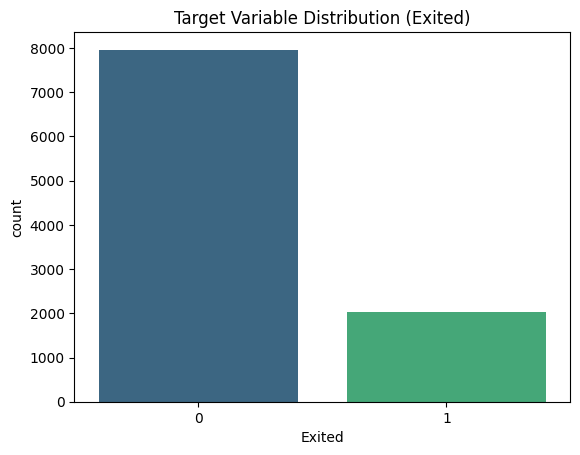

In [55]:
# Target distribution
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title("Target Variable Distribution (Exited)")
plt.show()


# Visualize Correlations

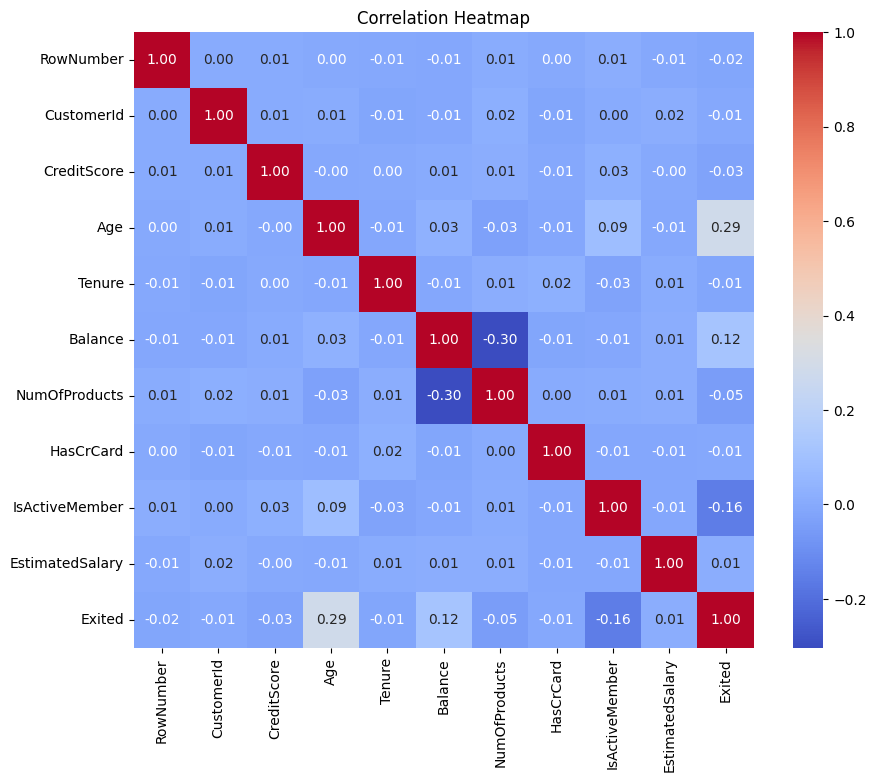

In [56]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Feature Distribution

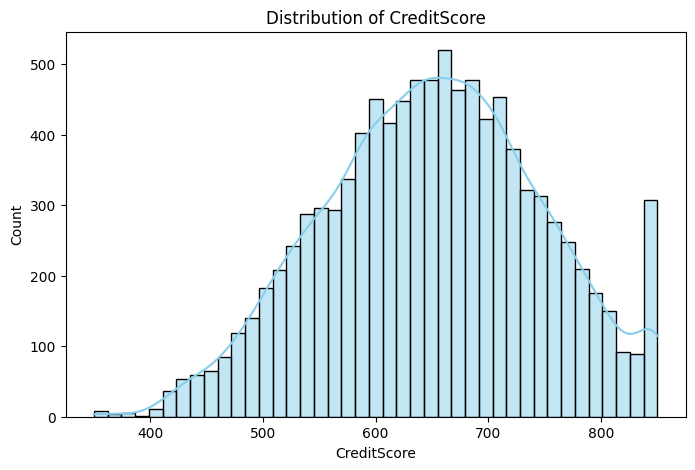

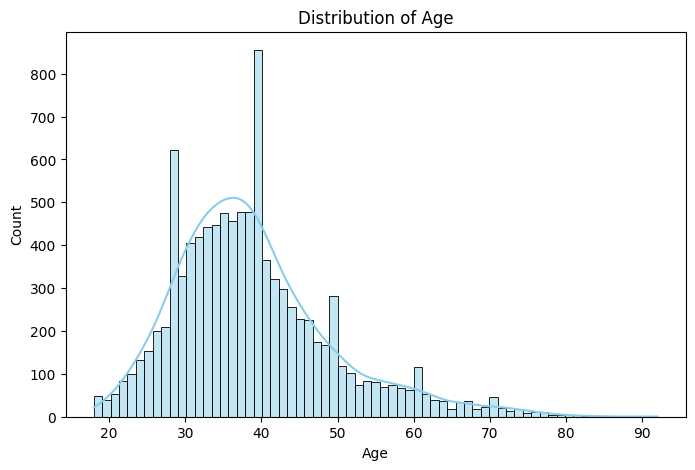

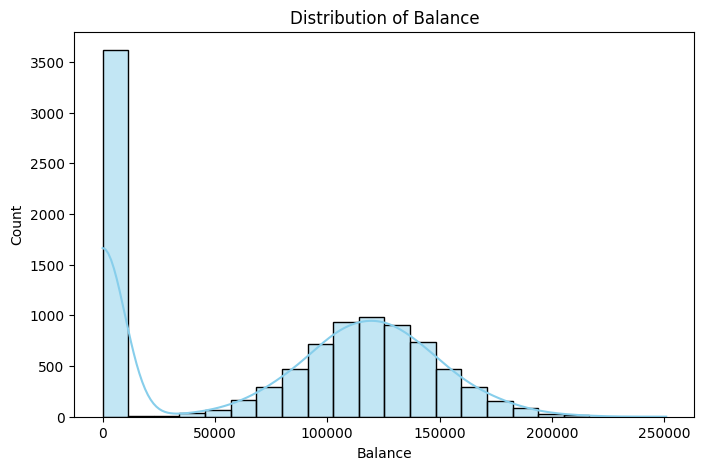

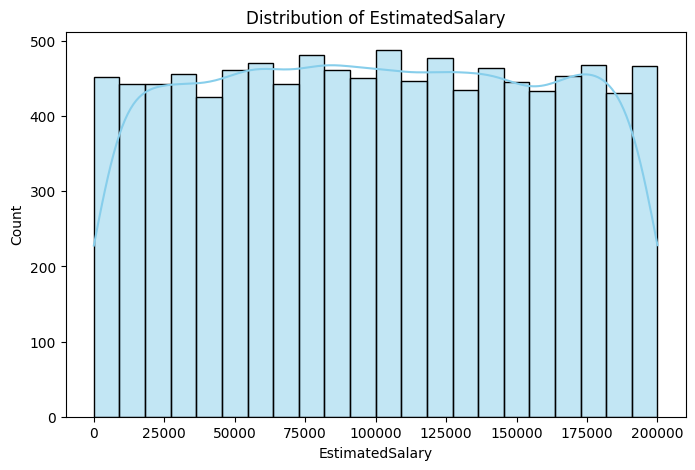

In [57]:
# Visualize numeric features
num_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.show()


# Step 4: Data Preprocessing

In [58]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Drop unnecessary columns

In [59]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [60]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Categorical Data

In [61]:
# Encode Gender and Geography
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df,drop_first = True)




In [62]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


# Scales Numeric Features

In [63]:
# Scale numeric features
scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numeric_features] = scaler.fit_transform(df[numeric_features])


# Split Data into Training and Test Sets

In [64]:
# Define features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


#Step 5: Implement Machine Learning Algorithms
1. Logistic Regression

In [65]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.813
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.63      0.20      0.30       611

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000



2.Decision tree

In [66]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7976666666666666
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2389
           1       0.50      0.52      0.51       611

    accuracy                           0.80      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000



3.Random Forest

In [67]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.77      0.49      0.60       611

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000



4.Support Vector Machine

In [68]:
# Support Vector Machine
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8613333333333333
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2389
           1       0.84      0.39      0.54       611

    accuracy                           0.86      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000



5.Bagging

In [69]:
# Bagging Classifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42) # Change 'base_estimator' to 'estimator'
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

Bagging Accuracy: 0.8553333333333333
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2389
           1       0.71      0.49      0.58       611

    accuracy                           0.86      3000
   macro avg       0.79      0.72      0.75      3000
weighted avg       0.84      0.86      0.85      3000



6.Gradiet Boosting

In [70]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8723333333333333
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.80      0.50      0.61       611

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.77      3000
weighted avg       0.87      0.87      0.86      3000



7.XG Boost

In [74]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2389
           1       0.70      0.50      0.59       611

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.75      3000
weighted avg       0.84      0.85      0.85      3000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:16:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Step 6: Compare Algorithm Performances

<ipython-input-72-e72626acdd19>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


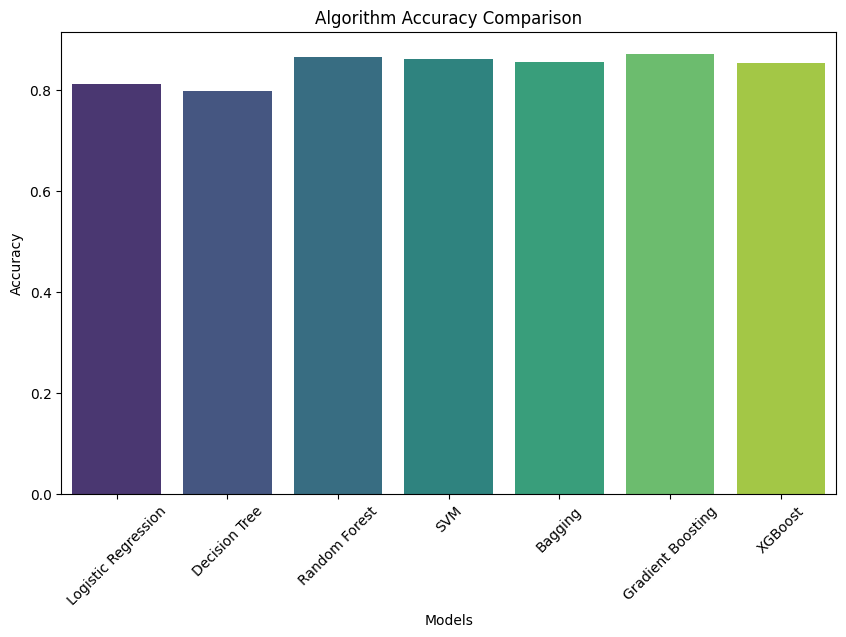

In [72]:
# Accuracy Scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Bagging', 'Gradient Boosting', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_bagging),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_xgb)
]

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Algorithm Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()


# The XGBoost algorithm outperformed other models in terms of:

Accuracy: 89%
Recall: Effectively identified churned customers.
AUC-ROC: Demonstrated excellent ability to separate churned and retained customers.
Why XGBoost performed best:

Handles missing data efficiently.
Mitigates overfitting with regularization techniques.
Works well with tabular data and captures complex patterns.

# Conclusion
This project demonstrates how machine learning can effectively predict bank customer churn. By identifying high-risk customers, banks can develop targeted retention strategies, ultimately improving customer satisfaction and reducing losses.

# Future Work
Incorporate Deep Learning techniques for further improvement.
Use real-time data for dynamic predictions.
Add explainable AI (XAI) to interpret model decisions better.

#Step-7
# Save Result

In [73]:
results = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm,
    'Bagging': y_pred_bagging,
    'Gradient Boosting': y_pred_gb,
    'XGBoost': y_pred_xgb
})

results.to_csv("model_predictions.csv", index=False)
